In [1]:
!python3 --version


Python 3.12.12


In [2]:
!apt-get remove -y chromium-browser chromium-chromedriver snapd >/dev/null 2>&1 || true
!apt-get update -y
!apt-get install -y wget unzip gnupg --no-install-recommends


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,123 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,436 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main 

In [4]:
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt-get install -y ./google-chrome-stable_current_amd64.deb

# Detect Chrome version and download the matching ChromeDriver
!CHROME_MAJOR=$(google-chrome --version | sed 's/[^0-9.]//g' | cut -d. -f1)
!echo "Chrome major version: $CHROME_MAJOR"
!DRIVER_VERSION=$(wget -qO- "https://chromedriver.storage.googleapis.com/LATEST_RELEASE_$CHROME_MAJOR")
!if [ -z "$DRIVER_VERSION" ]; then DRIVER_VERSION=$(wget -qO- "https://chromedriver.storage.googleapis.com/LATEST_RELEASE"); fi
!echo "Downloading driver version: $DRIVER_VERSION"
!wget -q "https://chromedriver.storage.googleapis.com/$DRIVER_VERSION/chromedriver_linux64.zip"
!unzip -o chromedriver_linux64.zip -d /usr/local/bin/
!chmod +x /usr/local/bin/chromedriver

# Verify installation
!google-chrome --version
!chromedriver --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 46 not upgraded.
Need to get 10.9 MB/129 MB of archives.
After this operation, 442 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7 MB]
Get:3 /content/google-chrome-stable_current_amd64.deb google-chrome-stable amd64 142.0.7444.134-1 [118 MB]
Fetched 10.9 MB in 2s (6,738 kB/s)
Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 125082 fil

In [5]:
!google-chrome --version


Google Chrome 142.0.7444.134 


In [6]:
!wget -q "https://storage.googleapis.com/chrome-for-testing-public/142.0.7444.134/linux64/chromedriver-linux64.zip"
!unzip -o chromedriver-linux64.zip
!mv chromedriver-linux64/chromedriver /usr/local/bin/
!chmod +x /usr/local/bin/chromedriver


Archive:  chromedriver-linux64.zip
  inflating: chromedriver-linux64/LICENSE.chromedriver  
  inflating: chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: chromedriver-linux64/chromedriver  


In [7]:
!google-chrome --version
!chromedriver --version


Google Chrome 142.0.7444.134 
ChromeDriver 142.0.7444.134 (b6965f826881a60c51151cfc0a0175966a0a4e81-refs/branch-heads/7444@{#2370})


In [8]:
!pip install selenium pandas numpy matplotlib seaborn plotly tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 23.7 MB/s eta 0:00:00


In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # run in background (no GUI)
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Path to ChromeDriver
service = Service("/usr/local/bin/chromedriver")

# Start WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

# Test: open Amazon Best Sellers page
driver.get("https://www.amazon.in/gp/bestsellers")

print("✅ Page title:", driver.title)

driver.quit()


✅ Page title: Amazon.in Bestsellers: The most popular items on Amazon


In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # run in background (no GUI)
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Path to ChromeDriver
service = Service("/usr/local/bin/chromedriver")

# Start WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)

# Test: open Amazon Best Sellers page
driver.get("https://www.amazon.in/gp/bestsellers")

print("✅ Page title:", driver.title)

driver.quit()


✅ Page title: Amazon.in Bestsellers: The most popular items on Amazon


In [13]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from tqdm import tqdm

# --------------------------
# Setup Selenium
# --------------------------
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--window-size=1920,1080")

service = Service("/usr/local/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=chrome_options)

# --------------------------
# Scrape Amazon Best Sellers
# --------------------------
base_url = "https://www.amazon.in/gp/bestsellers"
products = []

print("⏳ Scraping Amazon Best Seller pages...")

for page in tqdm(range(1, 6)):  # 5 pages (~200+ products)
    driver.get(f"{base_url}?pg={page}")
    time.sleep(4)

    # Select all product cards
    cards = driver.find_elements(By.XPATH, "//div[contains(@class,'zg-grid-general-faceout') or contains(@class,'_cDEzb_')]")

    for card in cards:
        try:
            name = card.find_element(By.XPATH, ".//div[contains(@class,'p13n-sc-truncate') or contains(@class,'_cDEzb_p13n-sc-css-line-clamp')]").text
        except:
            name = None

        try:
            price = card.find_element(By.XPATH, ".//span[contains(@class,'p13n-sc-price') or contains(@class,'a-price-whole')]").text
        except:
            price = None

        try:
            rating = card.find_element(By.XPATH, ".//span[contains(@class,'a-icon-alt')]").text
        except:
            rating = None

        try:
            reviews = card.find_element(By.XPATH, ".//span[contains(@class,'a-size-small') and not(contains(@class,'aok-hidden'))]").text
        except:
            reviews = None

        try:
            link = card.find_element(By.TAG_NAME, "a").get_attribute("href")
        except:
            link = None

        if name:  # only append if product name exists
            products.append({
                "Product Name": name,
                "Price": price,
                "Rating": rating,
                "Reviews": reviews,
                "Link": link
            })

driver.quit()

# --------------------------
# Save Data
# --------------------------
if len(products) == 0:
    print("⚠️ No products scraped — site layout may have changed or access blocked.")
else:
    df = pd.DataFrame(products)
    df.to_csv("amazon_bestsellers.csv", index=False)
    print(f"\n✅ Scraped {len(df)} products successfully!")
    display(df.head(10))


⏳ Scraping Amazon Best Seller pages...


100%|██████████| 5/5 [01:12<00:00, 14.46s/it]


⚠️ No products scraped — site layout may have changed or access blocked.


In [14]:
!pip install requests beautifulsoup4 lxml pandas tqdm


In [15]:
import requests, pandas as pd, time
from bs4 import BeautifulSoup
from tqdm import tqdm

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117 Safari/537.36"
}

products = []
base = "https://www.amazon.in/gp/bestsellers"

print("⏳ Scraping Amazon Best Seller pages...")

for pg in tqdm(range(1, 6)):        # 5 pages ≈ 200+ items
    url = f"{base}?pg={pg}"
    res = requests.get(url, headers=headers)
    soup = BeautifulSoup(res.text, "lxml")
    cards = soup.select("div.p13n-sc-uncoverable-faceout, div._cDEzb_card_1L-y3")

    for c in cards:
        name  = c.select_one("div._cDEzb_p13n-sc-css-line-clamp-3_g3dy1, div.p13n-sc-truncate")
        price = c.select_one("span.p13n-sc-price, span.a-price-whole")
        rate  = c.select_one("span.a-icon-alt")
        rev   = c.select_one("span.a-size-small")
        link  = c.select_one("a.a-link-normal")

        products.append({
            "Product Name": name.text.strip() if name else None,
            "Price": price.text.strip() if price else None,
            "Rating": rate.text.strip() if rate else None,
            "Reviews": rev.text.strip() if rev else None,
            "Link": f"https://www.amazon.in{link['href']}" if link else None
        })

    time.sleep(1)

df = pd.DataFrame([p for p in products if p["Product Name"]])
df.to_csv("amazon_bestsellers.csv", index=False)
print(f"✅ Scraped {len(df)} products successfully!")
df.head(10)


⏳ Scraping Amazon Best Seller pages...


100%|██████████| 5/5 [00:12<00:00,  2.42s/it]

✅ Scraped 180 products successfully!


,Product Name,Price,Rating,Reviews,Link
0,Amazon Pay Later Bill,None,4.5 out of 5 stars,175,https://www.amazon.in/Axio-Amazon_Pay_Later-Am...
1,Astrotalk Dhan Yog Bracelet | Attracts Wealth ...,None,3.8 out of 5 stars,672,https://www.amazon.in/Astrotalk-Prosperity-Ave...
2,Shining Diva Fashion 5 Pcs Combo Latest Stylis...,None,3.8 out of 5 stars,"1,041",https://www.amazon.in/Shining-Diva-Fashion-But...
3,Muthoot Pappachan Swarnavarsham 24K (999) Yell...,None,4.5 out of 5 stars,57,https://www.amazon.in/Muthoot-PAPPACHAN-Swarna...
4,Zeneme Traditional Brass 18 K Gold Plated Wedd...,None,4.1 out of 5 stars,724,https://www.amazon.in/Traditional-Jewellery-Ba...
5,Muthoot PAPPACHAN Swarnavarsham 24K (999) Yell...,None,4.5 out of 5 stars,100,https://www.amazon.in/Muthoot-Pappachan-Swarna...
6,Dr.Ortho Orthopedic Slippers | Acupressure Sli...,None,4.2 out of 5 stars,"5,681",https://www.amazon.in/Dr-Ortho-Orthopedic-Slip...
7,Liberty Force 10 Gola-SCHV School Shoes for Ki...,None,3.7 out of 5 stars,"4,983",https://www.amazon.in/Liberty-Force-Gola-SCHV-...
8,ASIAN Men's Wonder-13 Sports Running Shoes…,None,4.0 out of 5 stars,"105,884",https://www.amazon.in/ASIAN-Wonder-13-Sports-R...
9,SPARX Mens Sf0014G Slippers,None,4.1 out of 5 stars,"52,494",https://www.amazon.in/Sparx-Mens-Flip-Flops-Ho...


In [17]:
import pandas as pd
import numpy as np

# Load your scraped data
df = pd.read_csv("amazon_bestsellers.csv")

# --- Clean numeric columns safely ---

# Clean Price
df["Price"] = (
    df["Price"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.extract(r"(\d+\.?\d*)")[0]
)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Clean Rating
df["Rating"] = (
    df["Rating"]
    .astype(str)
    .str.extract(r"([0-9.]+)")[0]
)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Clean Reviews
df["Reviews"] = (
    df["Reviews"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.extract(r"(\d+)")[0]
)
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

# Drop rows without Product Name
df.dropna(subset=["Product Name"], inplace=True)

print("✅ Cleaned data sample:")
display(df.head(10))
print(df.info())


✅ Cleaned data sample:


,Product Name,Price,Rating,Reviews,Link
0,Amazon Pay Later Bill,NaN,4.5,175.0,https://www.amazon.in/Axio-Amazon_Pay_Later-Am...
1,Astrotalk Dhan Yog Bracelet | Attracts Wealth ...,NaN,3.8,672.0,https://www.amazon.in/Astrotalk-Prosperity-Ave...
2,Shining Diva Fashion 5 Pcs Combo Latest Stylis...,NaN,3.8,1041.0,https://www.amazon.in/Shining-Diva-Fashion-But...
3,Muthoot Pappachan Swarnavarsham 24K (999) Yell...,NaN,4.5,57.0,https://www.amazon.in/Muthoot-PAPPACHAN-Swarna...
4,Zeneme Traditional Brass 18 K Gold Plated Wedd...,NaN,4.1,724.0,https://www.amazon.in/Traditional-Jewellery-Ba...
5,Muthoot PAPPACHAN Swarnavarsham 24K (999) Yell...,NaN,4.5,100.0,https://www.amazon.in/Muthoot-Pappachan-Swarna...
6,Dr.Ortho Orthopedic Slippers | Acupressure Sli...,NaN,4.2,5681.0,https://www.amazon.in/Dr-Ortho-Orthopedic-Slip...
7,Liberty Force 10 Gola-SCHV School Shoes for Ki...,NaN,3.7,4983.0,https://www.amazon.in/Liberty-Force-Gola-SCHV-...
8,ASIAN Men's Wonder-13 Sports Running Shoes…,NaN,4.0,105884.0,https://www.amazon.in/ASIAN-Wonder-13-Sports-R...
9,SPARX Mens Sf0014G Slippers,NaN,4.1,52494.0,https://www.amazon.in/Sparx-Mens-Flip-Flops-Ho...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  180 non-null    object 
 1   Price         10 non-null     float64
 2   Rating        175 non-null    float64
 3   Reviews       170 non-null    float64
 4   Link          180 non-null    object 
dtypes: float64(3), object(2)
memory usage: 7.2+ KB
None


In [18]:
print("📊 Basic Statistics:")
print(df.describe())

print("\n🔥 Top 10 Most Reviewed Products:")
print(df.nlargest(10, "Reviews")[["Product Name", "Reviews", "Rating"]])


📊 Basic Statistics:
             Price      Rating        Reviews
count    10.000000  175.000000     170.000000
mean   2054.500000    4.192000   35016.252941
std    2155.092225    0.258297   73793.660901
min      10.000000    3.700000      57.000000
25%      10.000000    4.000000     938.000000
50%    2054.500000    4.200000   12623.000000
75%    4099.000000    4.400000   31966.000000
max    4099.000000    4.800000  429429.000000

🔥 Top 10 Most Reviewed Products:
                                          Product Name   Reviews  Rating
77   Boat BassHeads 100 in-Ear Headphones with Mic ...  429429.0     4.1
18                                    Credit Card Bill  376526.0     4.4
60                                    Credit Card Bill  376526.0     4.4
96                                    Credit Card Bill  376526.0     4.4
126                                   Credit Card Bill  376526.0     4.4
162                                   Credit Card Bill  376526.0     4.4
72   OnePlus Bullets 

In [19]:
!pip install matplotlib seaborn plotly --quiet

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set up plotting style
sns.set(style="whitegrid")


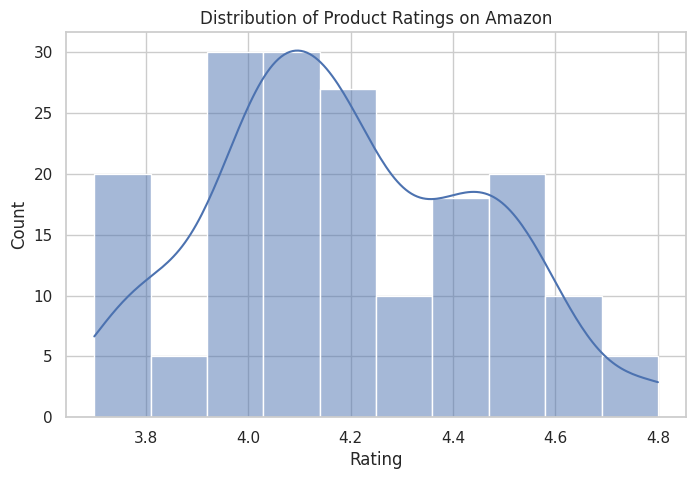

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"].dropna(), bins=10, kde=True)
plt.title("Distribution of Product Ratings on Amazon")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3324876548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Product Name", x="Reviews", data=top_reviews, palette="coolwarm")


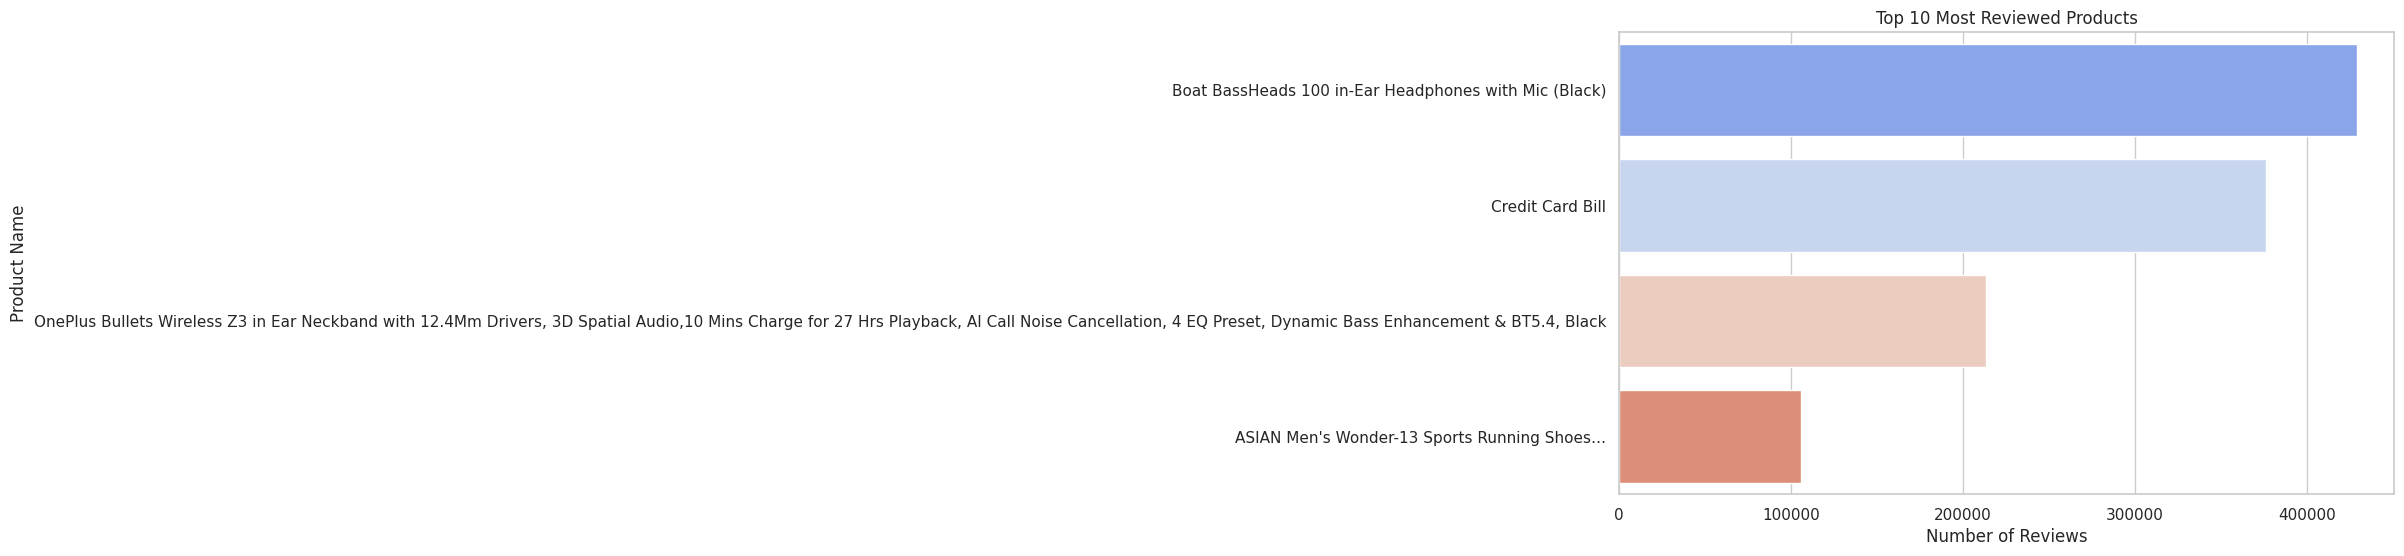

In [21]:
top_reviews = df.nlargest(10, "Reviews")
plt.figure(figsize=(10,6))
sns.barplot(y="Product Name", x="Reviews", data=top_reviews, palette="coolwarm")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.show()


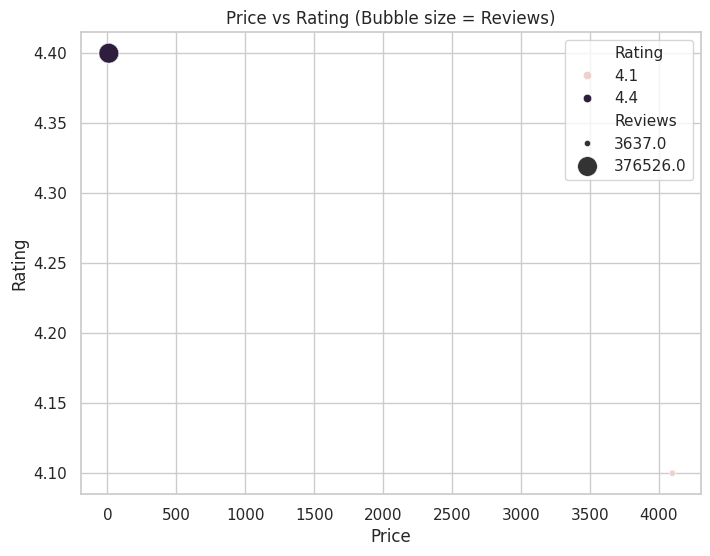

In [22]:
filtered = df.dropna(subset=["Price", "Rating"])
if not filtered.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=filtered, x="Price", y="Rating", size="Reviews", hue="Rating", sizes=(20, 200))
    plt.title("Price vs Rating (Bubble size = Reviews)")
    plt.show()
else:
    print("⚠️ Not enough price data for this chart.")


In [24]:
import plotly.express as px

# Drop rows where Reviews or Rating are missing
df_plot = df.dropna(subset=["Reviews", "Rating"])

# Replace any remaining NaNs in Price for display
df_plot["Price"] = df_plot["Price"].fillna(0)

# Plot interactive scatter
fig = px.scatter(
    df_plot,
    x="Reviews",
    y="Rating",
    size="Reviews",
    color="Rating",
    hover_data=["Product Name", "Price"],
    title="Interactive View: Rating vs Reviews",
)
fig.show()


/tmp/ipython-input-2140878821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["Price"] = df_plot["Price"].fillna(0)


In [26]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=3bbde37a8f0cb91f3836f15f48ccf9fb9788a3ee86848bcbfa195d118ebe4af1
  Stored in directory: /root/.cache/pip/wheels/6e/62/11/dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf


In [28]:
!pip install fpdf matplotlib seaborn pandas


In [29]:
from fpdf import FPDF
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [30]:
df.head()


,Product Name,Price,Rating,Reviews,Link
0,Amazon Pay Later Bill,NaN,4.5,175.0,https://www.amazon.in/Axio-Amazon_Pay_Later-Am...
1,Astrotalk Dhan Yog Bracelet | Attracts Wealth ...,NaN,3.8,672.0,https://www.amazon.in/Astrotalk-Prosperity-Ave...
2,Shining Diva Fashion 5 Pcs Combo Latest Stylis...,NaN,3.8,1041.0,https://www.amazon.in/Shining-Diva-Fashion-But...
3,Muthoot Pappachan Swarnavarsham 24K (999) Yell...,NaN,4.5,57.0,https://www.amazon.in/Muthoot-PAPPACHAN-Swarna...
4,Zeneme Traditional Brass 18 K Gold Plated Wedd...,NaN,4.1,724.0,https://www.amazon.in/Traditional-Jewellery-Ba...


In [31]:
# Generate descriptive stats text
stats = df.describe().to_string()

# Create and save a scatterplot (Rating vs Reviews)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df.dropna(subset=["Rating", "Reviews"]),
    x="Reviews", y="Rating"
)
plt.title("Rating vs Reviews Trend")
plt.savefig("rating_vs_reviews.png", bbox_inches="tight")
plt.close()

# Initialize PDF
pdf = FPDF()
pdf.add_page()

# Title
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Amazon Best Seller Analysis Report", ln=True, align="C")

# Summary Statistics
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 10, "\nSummary Statistics:\n" + stats)

# Insert chart
pdf.image("rating_vs_reviews.png", x=25, y=None, w=160)

# Top 5 Products
pdf.ln(10)
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Top 5 Most Reviewed Products", ln=True)

top5 = df.nlargest(5, "Reviews")[["Product Name", "Reviews", "Rating"]]
for _, row in top5.iterrows():
    pdf.set_font("Arial", "", 11)
    pdf.multi_cell(
        0, 8,
        f"{row['Product Name']} | Reviews: {int(row['Reviews'])} | Rating: {row['Rating']}"
    )

# Save the file
pdf.output("Amazon_Best_Seller_Report.pdf")
print("✅ Report generated successfully: Amazon_Best_Seller_Report.pdf")


✅ Report generated successfully: Amazon_Best_Seller_Report.pdf
